In [2]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
# normally you wanna put all imports up here

In [3]:
data = load_breast_cancer()

In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
data.data.shape

(569, 30)

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
# confirm shape is identical to X (data)
data.target.shape

(569,)

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [12]:
# scale the data (important in deep learning) via normalization
# else weights will be too sensitive when inputs have big range, or not sensitive enough with small range
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# now for TensorFlow stuff!
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)), # input layer to specify size of the input (D)                                
    tf.keras.layers.Dense(1, activation='sigmoid') # Dense layer takes input and does linear transformation to get an output of size 1
])

# Alternatively, you can do:
# model = tf.keras.models.Sequential()
# model.add (tf.keras.layers.Dense(1, input shape=(D, ), activation='sigmoid') )

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model, 100 iterations
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 20ms/step - loss: 0.5911 - accuracy: 0.7218 - val_loss: 0.4977 - val_accuracy: 0.7606
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5485 - accuracy: 0.7585 - val_loss: 0.4613 - val_accuracy: 0.7766
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5110 - accuracy: 0.7717 - val_loss: 0.4286 - val_accuracy: 0.8032
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4767 - accuracy: 0.8058 - val_loss: 0.4002 - val_accuracy: 0.8245
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.4473 - accuracy: 0.8189 - val_loss: 0.3749 - val_accuracy: 0.8404
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4206 - accuracy: 0.8451 - val_loss: 0.3526 - val_accuracy: 0.8670
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3965 - accuracy: 0.8609 - val_loss: 0.3330 - val_accuracy: 0.8723
Epoch 8/100


In [14]:
# evaluate the model. evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.1013 - accuracy: 0.9738
Train score: [0.10134566575288773, 0.9737532734870911]
6/6 [==============================] - 0s 4ms/step - loss: 0.0729 - accuracy: 0.9734
Test score: [0.07287095487117767, 0.9734042286872864]


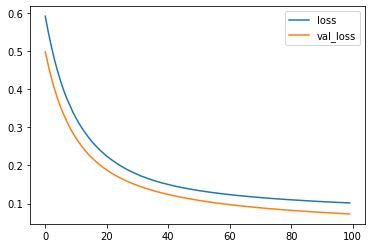

In [15]:
# plotting the loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss') # training loss
plt.plot(r.history['val_loss'], label='val_loss') # validation loss
plt.legend()

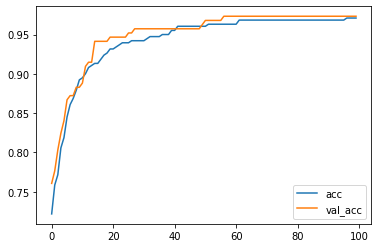

In [16]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc') # training loss
plt.plot(r.history['val_accuracy'], label='val_acc') # validation loss
plt.legend()

# Part 2: making predictions

In [17]:
# keras API is similar to sklearn API: pass in a 2D array (X) into model.predict
P = model.predict(X_test)
print(P) # theyre outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

[[9.99148786e-01]
 [6.77753074e-14]
 [1.40445858e-01]
 [9.96933460e-01]
 [1.55145228e-02]
 [8.36082677e-07]
 [4.94872361e-01]
 [8.77231359e-04]
 [2.59107351e-03]
 [8.90887260e-01]
 [9.86662030e-01]
 [1.10785579e-04]
 [9.86471891e-01]
 [9.81404662e-01]
 [5.18018305e-02]
 [9.91308212e-01]
 [9.99040484e-01]
 [9.88853335e-01]
 [3.78026664e-02]
 [9.72312689e-01]
 [9.58687901e-01]
 [8.62782001e-02]
 [9.96368766e-01]
 [2.30680944e-05]
 [9.97885585e-01]
 [7.35887289e-02]
 [1.64982617e-01]
 [9.86037970e-01]
 [1.71688214e-06]
 [5.86372018e-02]
 [9.99797940e-01]
 [8.01002979e-03]
 [9.97629166e-01]
 [9.91444707e-01]
 [9.93689477e-01]
 [9.88931656e-01]
 [9.32590306e-01]
 [9.34800506e-03]
 [9.97618318e-01]
 [9.77999151e-01]
 [9.27111506e-02]
 [8.61822248e-01]
 [9.91528273e-01]
 [6.33257926e-02]
 [9.66972351e-01]
 [1.38743490e-01]
 [9.93510723e-01]
 [9.67782259e-01]
 [9.56200421e-01]
 [9.99385953e-01]
 [3.65078449e-04]
 [9.96187449e-01]
 [9.94187832e-01]
 [3.22538704e-01]
 [5.91034949e-01]
 [9.876025

In [18]:
# Round to get actual predictions
# It is a 2D array of Nx1 (since Dense layer can be more than 1 output), so flatten it to an N length vector
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0.]


In [19]:
# The accuracy is obtained by adding all 1's in this array of booleans and dividing by N (total number of predictions)
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.973404255319149
6/6 [==============================] - 0s 3ms/step - loss: 0.0729 - accuracy: 0.9734
Evaluate output: [0.07287095487117767, 0.9734042286872864]


# Part 3: saving and loading a model

In [20]:
# arg1 is file path
model.save('linearclassifer.h5')

In [22]:
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K Jul 14 22:55 linearclassifer.h5
drwxr-xr-x 1 root root 4.0K Jul 13 13:43 sample_data


In [25]:
model = tf.keras.models.load_model('linearclassifer.h5')
print(model.layers[0])

In [ ]:
# In addition to downloading the file via the GUI in the side menu, you can also download the model like this
from google.colab import files
files.download('linearclassifer.h5')